<a href="https://colab.research.google.com/github/snehuman/Aspect-Analysis-and-Visualization-of-Indian-Unicorns/blob/main/visualisation_of_indian_unicorns_python_projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#Import the required python libraries

#Preprocessing of data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as ss

#Visualization of data
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go

In [47]:
#Reading the dataset

df = pd.read_csv('/content/Indian Unicorns Dataset.csv')
#Displaying the dataframe
df

,S No.,Unicorns,Segment,Valuation ($ Bn),FY21 P/L (Cr),FY20 P/L (Cr),FY21 Op Revenue (Cr),FY21 Expenses (Cr),FY21 EBITDA Margin,FY21 Exp/Op Revenue,Total Funding ($ Mn),Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
0,1,Acko,Fintech,1.1,-132.5,-188.0,209.0,341.5,-53.44%,1.63,458,775.0,2017,2021.0,4.0,Active,Mumbai,"Varun Dua, Ruchi Deepak","General Atlantic, Lightspeed Venture Partners,..."
1,2,Amagi,SaaS,1.0,20.7,-18.7,219.3,198.0,12.70%,0.90,240,497.0,2008,2022.0,14.0,Active,Bengaluru,"Baskar Subramanian, Srinivasan KA, Srividhya S...","Accel, Norwest Venture Partners, PremjiInvest"
2,3,Apna,HR Tech,1.1,-28.3,0.3,17.0,45.4,-161.75%,2.67,194,645.0,2019,2021.0,2.0,Active,Bengaluru,Nimrit Parikh,"Sequoia Capital, Tiger Global, Lightspeed Indi..."
3,4,Bharatpe,Fintech,2.9,-277.0,-207.0,119.1,462.0,-141.01%,3.88,701,1490.0,2018,2021.0,3.0,Active,Delhi NCR,"Ashneer Grover, Shashvat Nakrani","Alteria Capital, BEENEXT, Coatue, InnoVen Capi..."
4,5,BigBasket,Grocery,1.8,-600.0,-1035.0,12595.0,13257.0,-2.88%,1.05,"1,060",6919.0,2011,2019.0,8.0,Acquired,Bengaluru,"VS Sudhakar, Hari Menon, Vipul Parekh, VS Rame...","Alibaba Group, Helion Venture Partners, Paytm ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,Zerodha,Fintech,2.0,1122.0,424.0,2729.0,1260.0,54.47%,0.46,NaN,1664.0,2010,2020.0,10.0,Boostrapped,Bengaluru,"Nithin Kamath, Nikhil Kamath, Kailash Nadh",NaN
99,100,Zeta,Fintech,1.5,NaN,NaN,NaN,NaN,NaN,NaN,340,1379.0,2015,2021.0,6.0,Active,Bengaluru,"Bhavin Turakhia, Ramki Gaddipati",Sodexo
100,101,Zetwerk,Manufacturing,2.5,-41.2,-29.1,835.5,909.0,-1.17%,1.09,650,832.0,2018,2021.0,3.0,Active,Bengaluru,"Amrit Acharya, Srinath Ramakkrushnan, Vishal C...","D2 Capital Partners, Greenoaks Capital, InnoVe..."
101,102,Zoho,SaaS,1.0,1917.0,801.0,5230.0,3024.0,50.90%,0.58,NaN,12272.0,1996,NaN,NaN,Bootstrapped,Chennai,"Sridhar Vembu, Sreenivas Kanumuru, Tony Thomas",NaN


In [48]:
#Checking the column/attribute names

df.columns

Index(['S No.', 'Unicorns', 'Segment', 'Valuation ($ Bn)', 'FY21 P/L (Cr)',
       'FY20 P/L (Cr)', 'FY21 Op Revenue (Cr)', 'FY21 Expenses (Cr)',
       'FY21 EBITDA Margin', 'FY21 Exp/Op Revenue', 'Total Funding ($ Mn)',
       'Head Count', 'Founded In', 'Unicorn In', 'Unicorn Age',
       'Current Status', 'Headquarters', 'Founders', 'Key Investors'],
      dtype='object')

In [49]:
# dropping sno. column
df = df.drop(["S No."], axis = 1)

In [50]:
#dropping all the null values from data set
df = df.dropna()
df

,Unicorns,Segment,Valuation ($ Bn),FY21 P/L (Cr),FY20 P/L (Cr),FY21 Op Revenue (Cr),FY21 Expenses (Cr),FY21 EBITDA Margin,FY21 Exp/Op Revenue,Total Funding ($ Mn),Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
0,Acko,Fintech,1.1,-132.5,-188.0,209.00,341.50,-53.44%,1.63,458,775.0,2017,2021.0,4.0,Active,Mumbai,"Varun Dua, Ruchi Deepak","General Atlantic, Lightspeed Venture Partners,..."
1,Amagi,SaaS,1.0,20.7,-18.7,219.30,198.00,12.70%,0.90,240,497.0,2008,2022.0,14.0,Active,Bengaluru,"Baskar Subramanian, Srinivasan KA, Srividhya S...","Accel, Norwest Venture Partners, PremjiInvest"
2,Apna,HR Tech,1.1,-28.3,0.3,17.00,45.40,-161.75%,2.67,194,645.0,2019,2021.0,2.0,Active,Bengaluru,Nimrit Parikh,"Sequoia Capital, Tiger Global, Lightspeed Indi..."
3,Bharatpe,Fintech,2.9,-277.0,-207.0,119.10,462.00,-141.01%,3.88,701,1490.0,2018,2021.0,3.0,Active,Delhi NCR,"Ashneer Grover, Shashvat Nakrani","Alteria Capital, BEENEXT, Coatue, InnoVen Capi..."
4,BigBasket,Grocery,1.8,-600.0,-1035.0,12595.00,13257.00,-2.88%,1.05,"1,060",6919.0,2011,2019.0,8.0,Acquired,Bengaluru,"VS Sudhakar, Hari Menon, Vipul Parekh, VS Rame...","Alibaba Group, Helion Venture Partners, Paytm ..."
5,Billdesk,Fintech,2.5,246.0,211.0,2124.00,1880.00,16.79%,0.89,241,486.0,2000,2018.0,18.0,Acquired,Mumbai,"Ajay Kaushal,Karthik Ganapathy, Srinivasu Mn","Clearstone Venture Partners, State Bank of Ind..."
6,BlackBuck,Logistics,1.0,-241.4,-452.4,866.70,1134.60,-19.90%,1.31,364,2418.0,2015,2021.0,6.0,Active,Bengaluru,"Chanakya Hridaya, Rajesh Yabaji, Ramasubramani...","Accel, Goldman Sachs, IFC Asset Management Com..."
7,Blinkit,Grocery,1.0,-558.0,-916.0,2725.00,3299.00,-16.48%,1.21,"1,000",5562.0,2013,2021.0,8.0,Active,Delhi NCR,"Albinder Dhindsa, Saurabh Kumar","Tiger Global Management, Sequoia Capital India..."
10,CarDekho,Used car platform,1.2,-343.0,-327.0,884.40,1277.60,-32.24%,1.44,498,2057.0,2005,2021.0,16.0,Active,Delhi NCR,"Amit Jain, Anurag Jain","Sequoia Capital India, Hillhouse Capital Group..."
11,Cars24,Used car platform,3.3,-211.3,-297.2,2718.00,2963.00,-6.61%,1.09,"1,300",5918.0,2015,2020.0,5.0,Active,Delhi NCR,"Mehul Agrawal, Ruchit Agarwal, Vikram Chopra","Sequoia Capital India, DST Global, MPGI, KCK, ..."


In [51]:
#Checking the shape of the dataframe

df.shape

(59, 18)

In [52]:
#Check the information and display it

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 102
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unicorns              59 non-null     object 
 1   Segment               59 non-null     object 
 2   Valuation ($ Bn)      59 non-null     object 
 3   FY21 P/L (Cr)         59 non-null     object 
 4   FY20 P/L (Cr)         59 non-null     object 
 5   FY21 Op Revenue (Cr)  59 non-null     float64
 6   FY21 Expenses (Cr)    59 non-null     float64
 7   FY21 EBITDA Margin    59 non-null     object 
 8   FY21 Exp/Op Revenue   59 non-null     float64
 9   Total Funding ($ Mn)  59 non-null     object 
 10  Head Count            59 non-null     float64
 11  Founded In            59 non-null     int64  
 12  Unicorn In            59 non-null     float64
 13  Unicorn Age           59 non-null     float64
 14  Current Status        59 non-null     object 
 15  Headquarters          59 non-

In [53]:
# Display the first 15 rows of the dataframe

df.head(15)

,Unicorns,Segment,Valuation ($ Bn),FY21 P/L (Cr),FY20 P/L (Cr),FY21 Op Revenue (Cr),FY21 Expenses (Cr),FY21 EBITDA Margin,FY21 Exp/Op Revenue,Total Funding ($ Mn),Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
0,Acko,Fintech,1.1,-132.5,-188.0,209.00,341.50,-53.44%,1.63,458,775.0,2017,2021.0,4.0,Active,Mumbai,"Varun Dua, Ruchi Deepak","General Atlantic, Lightspeed Venture Partners,..."
1,Amagi,SaaS,1.0,20.7,-18.7,219.30,198.00,12.70%,0.90,240,497.0,2008,2022.0,14.0,Active,Bengaluru,"Baskar Subramanian, Srinivasan KA, Srividhya S...","Accel, Norwest Venture Partners, PremjiInvest"
2,Apna,HR Tech,1.1,-28.3,0.3,17.00,45.40,-161.75%,2.67,194,645.0,2019,2021.0,2.0,Active,Bengaluru,Nimrit Parikh,"Sequoia Capital, Tiger Global, Lightspeed Indi..."
3,Bharatpe,Fintech,2.9,-277.0,-207.0,119.10,462.00,-141.01%,3.88,701,1490.0,2018,2021.0,3.0,Active,Delhi NCR,"Ashneer Grover, Shashvat Nakrani","Alteria Capital, BEENEXT, Coatue, InnoVen Capi..."
4,BigBasket,Grocery,1.8,-600.0,-1035.0,12595.00,13257.00,-2.88%,1.05,"1,060",6919.0,2011,2019.0,8.0,Acquired,Bengaluru,"VS Sudhakar, Hari Menon, Vipul Parekh, VS Rame...","Alibaba Group, Helion Venture Partners, Paytm ..."
5,Billdesk,Fintech,2.5,246.0,211.0,2124.00,1880.00,16.79%,0.89,241,486.0,2000,2018.0,18.0,Acquired,Mumbai,"Ajay Kaushal,Karthik Ganapathy, Srinivasu Mn","Clearstone Venture Partners, State Bank of Ind..."
6,BlackBuck,Logistics,1.0,-241.4,-452.4,866.70,1134.60,-19.90%,1.31,364,2418.0,2015,2021.0,6.0,Active,Bengaluru,"Chanakya Hridaya, Rajesh Yabaji, Ramasubramani...","Accel, Goldman Sachs, IFC Asset Management Com..."
7,Blinkit,Grocery,1.0,-558.0,-916.0,2725.00,3299.00,-16.48%,1.21,"1,000",5562.0,2013,2021.0,8.0,Active,Delhi NCR,"Albinder Dhindsa, Saurabh Kumar","Tiger Global Management, Sequoia Capital India..."
10,CarDekho,Used car platform,1.2,-343.0,-327.0,884.40,1277.60,-32.24%,1.44,498,2057.0,2005,2021.0,16.0,Active,Delhi NCR,"Amit Jain, Anurag Jain","Sequoia Capital India, Hillhouse Capital Group..."
11,Cars24,Used car platform,3.3,-211.3,-297.2,2718.00,2963.00,-6.61%,1.09,"1,300",5918.0,2015,2020.0,5.0,Active,Delhi NCR,"Mehul Agrawal, Ruchit Agarwal, Vikram Chopra","Sequoia Capital India, DST Global, MPGI, KCK, ..."


In [54]:
# Display the last 15 rows of the dataframe

df.tail(15)

,Unicorns,Segment,Valuation ($ Bn),FY21 P/L (Cr),FY20 P/L (Cr),FY21 Op Revenue (Cr),FY21 Expenses (Cr),FY21 EBITDA Margin,FY21 Exp/Op Revenue,Total Funding ($ Mn),Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
73,Pine Labs,Fintech,6.0,-56.0,-147.0,650.00,757.5,18.02%,1.17,"1,412",2562.0,1998,2020.0,22.0,Active,Delhi NCR,"Lokvir Kapoor, Tarun Upaday, Rajul Garg","Actis, Flipkart, Lone Pine Capital, Madison In..."
74,Policybazaar,Fintech,4.6,-105.0,-304.0,886.70,957.4,-16.70%,1.08,767,5120.0,2008,2018.0,10.0,Listed,Delhi NCR,"Yashish Dahiya, Avaneesh Nirjar, Alok Bansal","Tencent, Tiger Global Management, SoftBank Vis..."
78,Quikr,Ecommerce,<1,-55.0,-563.0,60.75,124.0,-53.67%,2.04,424,2127.0,2008,2015.0,7.0,Former Unicorn,Bengaluru,Pranay Chulet,"Kinnevik AB, Brand Capital, Tiger Global Manag..."
80,Rebel Foods,Foodtech,1.4,-364.0,-454.0,405.00,769.0,-52.93%,1.90,535,2189.0,2011,2021.0,10.0,Active,Mumbai,"Jaydeep Barman, Kallol Banerjee","Qatar Investment Authority, Alteria Capital, S..."
81,ReNew Power,Energy Tech,3.2,-803.0,-278.0,4826.70,5957.4,82.99%,1.23,"3,610",1492.0,2011,2017.0,6.0,Active,Delhi NCR,Sumant Sinha,"Goldman Sachs, Franklin Templeton India, JP Mo..."
83,ShareChat,Vernacular social media,3.7,-1461.0,-677.0,80.30,1557.0,-1500.50%,19.39,"1,400",2193.0,2015,2021.0,6.0,Active,Bengaluru,"Ankush Sachdeva, Bhanu Singh, Farid Ahsan","Google Launchpad Accelerator, India Quotient, ..."
87,Spinny,Used car marketplace,1.8,-110.0,-76.0,25.30,150.0,-233.34%,5.93,514,2086.0,2015,2021.0,6.0,Active,Delhi NCR,"Niraj Singh, Mohit Gupta, Ramanshu Mahaur","General Catalyst, Tiger Global Management, Ave..."
88,Swiggy,Foodtech,10.0,-1617.0,-3920.0,2547.00,4139.4,-49.24%,1.63,"4,800",18459.0,2014,2018.0,4.0,Active,Bengaluru,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Accel, Amansa Holdings, Bessemer Venture Partn..."
89,Udaan,Ecommerce,3.1,-2482.0,-2519.0,5919.00,8742.0,-37.31%,1.48,"1,500",11512.0,2016,2018.0,2.0,Active,Bengaluru,"Sujeet Kumar, Amod Malviya, Vaibhav Gupta","Lightspeed Venture Partners, GGV Capital, Tenc..."
90,Unacademy,Edtech,3.4,-1537.0,-258.7,398.00,2030.0,-320.32%,5.10,849,8226.0,2015,2020.0,5.0,Active,Bengaluru,"Gaurav Munjal, Hemesh Singh, Roman Saini, Sach...","Ashish Tulsian, Blume Ventures, Dragoneer Inve..."


In [55]:
#Display the datatypes of all the columns(attributes) of the dataframe

df.dtypes

,0
Unicorns,object
Segment,object
Valuation ($ Bn),object
FY21 P/L (Cr),object
FY20 P/L (Cr),object
FY21 Op Revenue (Cr),float64
FY21 Expenses (Cr),float64
FY21 EBITDA Margin,object
FY21 Exp/Op Revenue,float64
Total Funding ($ Mn),object


In [56]:
#Dispalying the sum of the null values in each column(attribute)

df.isnull().sum()

,0
Unicorns,0
Segment,0
Valuation ($ Bn),0
FY21 P/L (Cr),0
FY20 P/L (Cr),0
FY21 Op Revenue (Cr),0
FY21 Expenses (Cr),0
FY21 EBITDA Margin,0
FY21 Exp/Op Revenue,0
Total Funding ($ Mn),0


In [57]:
# using describe() function

df.describe()

,FY21 Op Revenue (Cr),FY21 Expenses (Cr),FY21 Exp/Op Revenue,Head Count,Founded In,Unicorn In,Unicorn Age
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1290.225932,1775.696102,7.901186,3677.694915,2013.016949,2020.067797,7.050847
std,1971.074952,2322.284994,42.936523,4682.540054,4.396282,1.946388,4.103925
min,0.860000,15.510000,0.730000,113.000000,1998.000000,2014.000000,2.000000
25%,214.150000,424.060000,1.090000,705.500000,2010.500000,2019.000000,4.500000
50%,666.200000,999.000000,1.440000,2086.000000,2015.000000,2021.000000,6.000000
75%,1675.500000,2120.000000,2.125000,4035.500000,2016.000000,2021.000000,8.500000
max,12595.000000,13257.000000,331.400000,18459.000000,2020.000000,2022.000000,22.000000


In [58]:
#for obtaining max values

df.max()

,0
Unicorns,upGrad
Segment,Vernacular social media
Valuation ($ Bn),<1
FY21 P/L (Cr),55.7
FY20 P/L (Cr),9.6
FY21 Op Revenue (Cr),12595.0
FY21 Expenses (Cr),13257.0
FY21 EBITDA Margin,82.99%
FY21 Exp/Op Revenue,331.4
Total Funding ($ Mn),878


In [59]:
#for obtaining min values

df.min()

,0
Unicorns,Acko
Segment,Content to commerce
Valuation ($ Bn),1.0
FY21 P/L (Cr),-101.0
FY20 P/L (Cr),-100.0
FY21 Op Revenue (Cr),0.86
FY21 Expenses (Cr),15.51
FY21 EBITDA Margin,-1.17%
FY21 Exp/Op Revenue,0.73
Total Funding ($ Mn),"1,000"


In [60]:
df.rename(columns={"Valuation ($ Bn)":"valuation", "FY21 P/L (Cr)":"FY21", "FY20 P/L (Cr)":"FY20", "FY21 Op Revenue (Cr)":"revenue_op_20", "FY21 Expenses (Cr)":"expenses_21"},inplace=True)
df.rename(columns={"FY21 EBITDA Margin":"margin_21", "FY21 Exp/Op Revenue":"exp/op_revenue_21", "Total Funding ($ Mn)":"total_funding"},inplace=True)
df.head(5)

,Unicorns,Segment,valuation,FY21,FY20,revenue_op_20,expenses_21,margin_21,exp/op_revenue_21,total_funding,Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
0,Acko,Fintech,1.1,-132.5,-188.0,209.0,341.5,-53.44%,1.63,458,775.0,2017,2021.0,4.0,Active,Mumbai,"Varun Dua, Ruchi Deepak","General Atlantic, Lightspeed Venture Partners,..."
1,Amagi,SaaS,1.0,20.7,-18.7,219.3,198.0,12.70%,0.90,240,497.0,2008,2022.0,14.0,Active,Bengaluru,"Baskar Subramanian, Srinivasan KA, Srividhya S...","Accel, Norwest Venture Partners, PremjiInvest"
2,Apna,HR Tech,1.1,-28.3,0.3,17.0,45.4,-161.75%,2.67,194,645.0,2019,2021.0,2.0,Active,Bengaluru,Nimrit Parikh,"Sequoia Capital, Tiger Global, Lightspeed Indi..."
3,Bharatpe,Fintech,2.9,-277.0,-207.0,119.1,462.0,-141.01%,3.88,701,1490.0,2018,2021.0,3.0,Active,Delhi NCR,"Ashneer Grover, Shashvat Nakrani","Alteria Capital, BEENEXT, Coatue, InnoVen Capi..."
4,BigBasket,Grocery,1.8,-600.0,-1035.0,12595.0,13257.0,-2.88%,1.05,"1,060",6919.0,2011,2019.0,8.0,Acquired,Bengaluru,"VS Sudhakar, Hari Menon, Vipul Parekh, VS Rame...","Alibaba Group, Helion Venture Partners, Paytm ..."


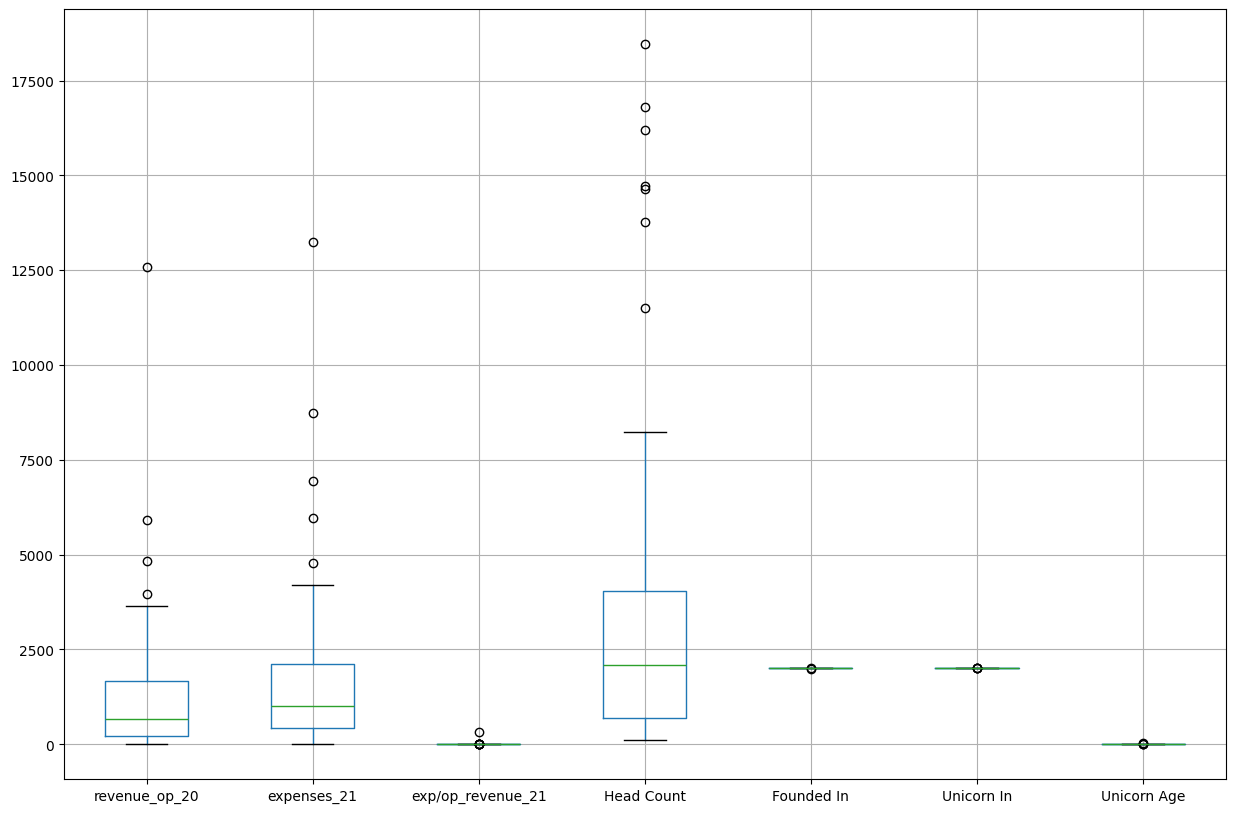

In [61]:
### Box Plot (Detect Outliers)
boxplot = df.boxplot(figsize = (15,10))

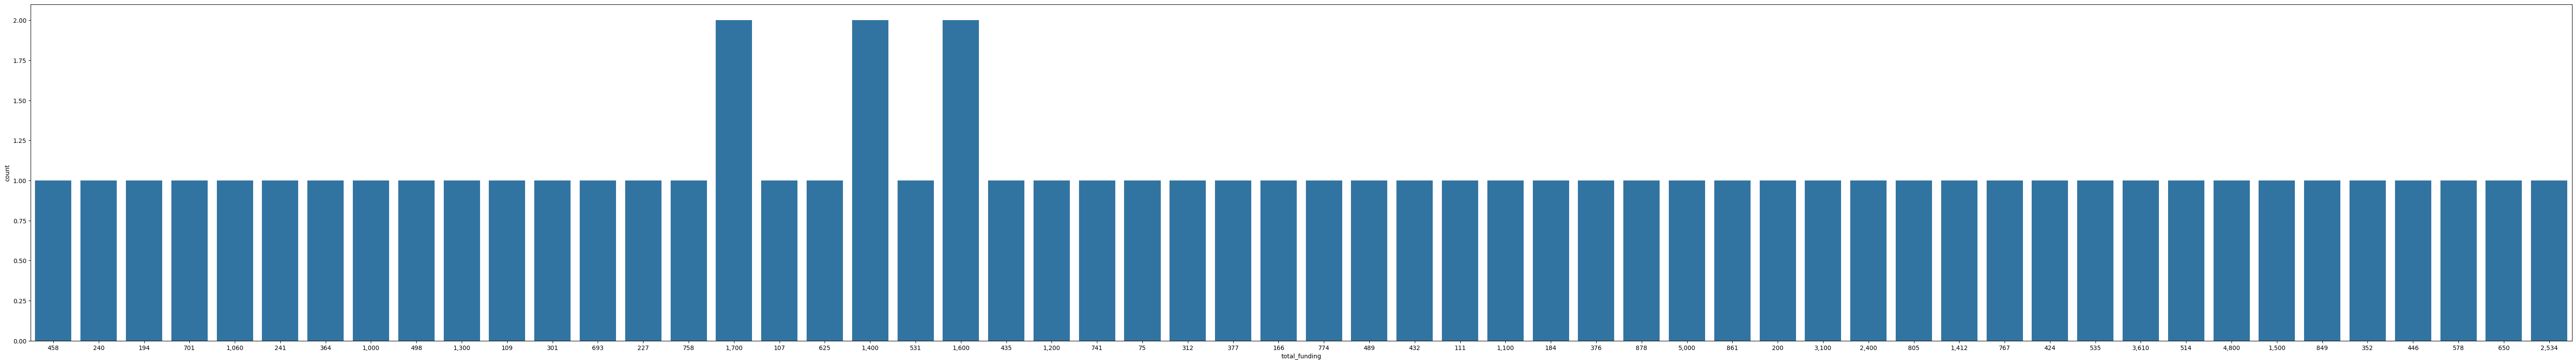

In [62]:
### Count Plot (count the categorical data)
plt.figure(figsize=(75,10))
sns.countplot(x= df.total_funding)
plt.show()

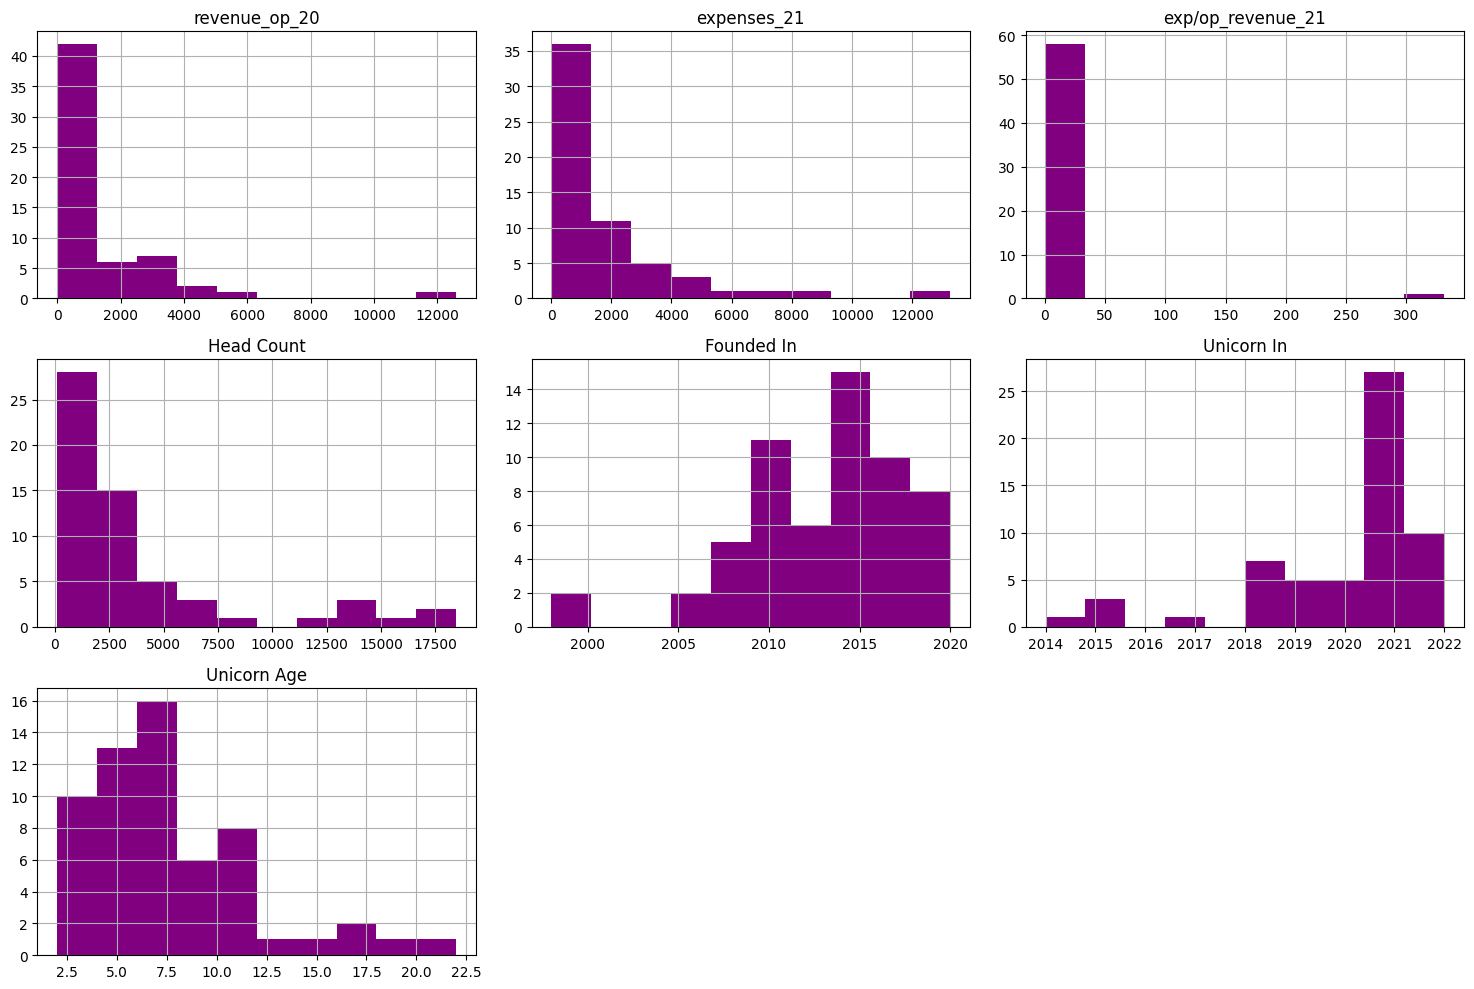

In [63]:
# Values of different columns of dataset
df.hist(bins=10, figsize=(15, 10), color="purple")
plt.tight_layout()

# New Section

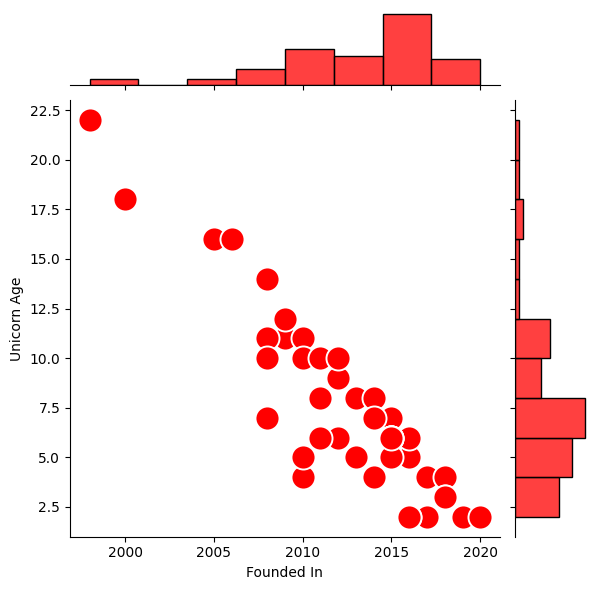

In [64]:
# Jointplot (Scatter Plot + Histogram)
sns.jointplot(x='Founded In',y='Unicorn Age',data= df ,s=300,color='red')

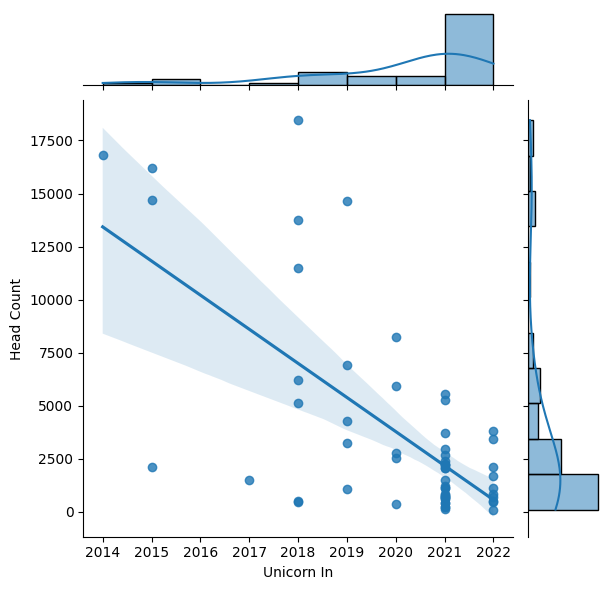

In [65]:
sns.jointplot(x='Unicorn In',y='Head Count',kind='reg',data=df)
plt.show()

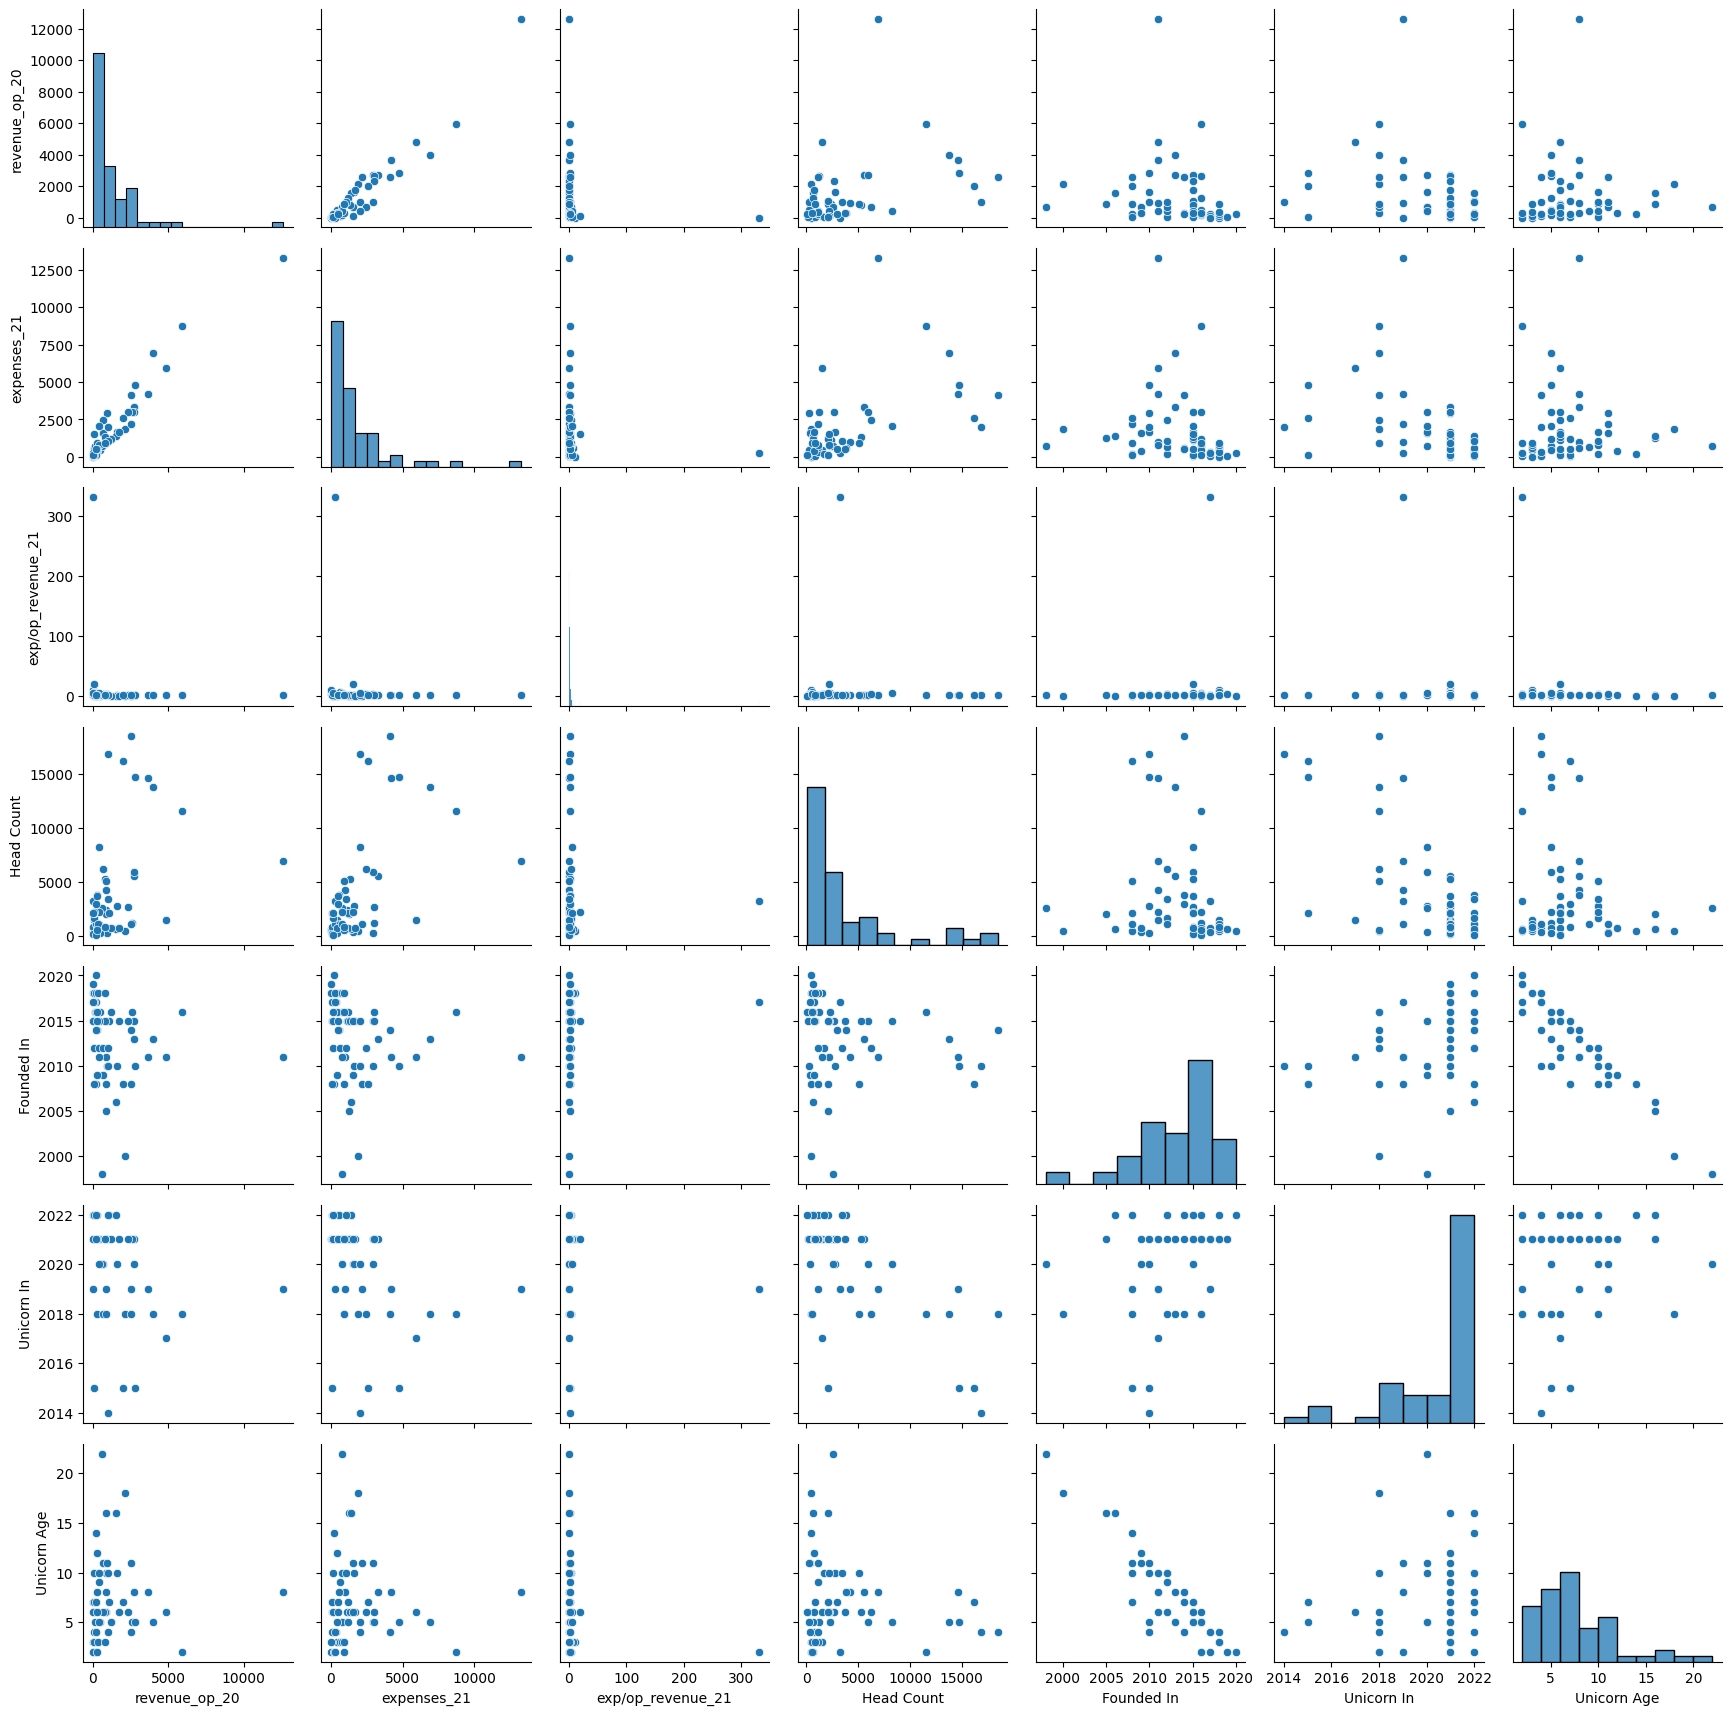

In [66]:
### Multivariate
a = sns.PairGrid(df)
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)
plt.show()

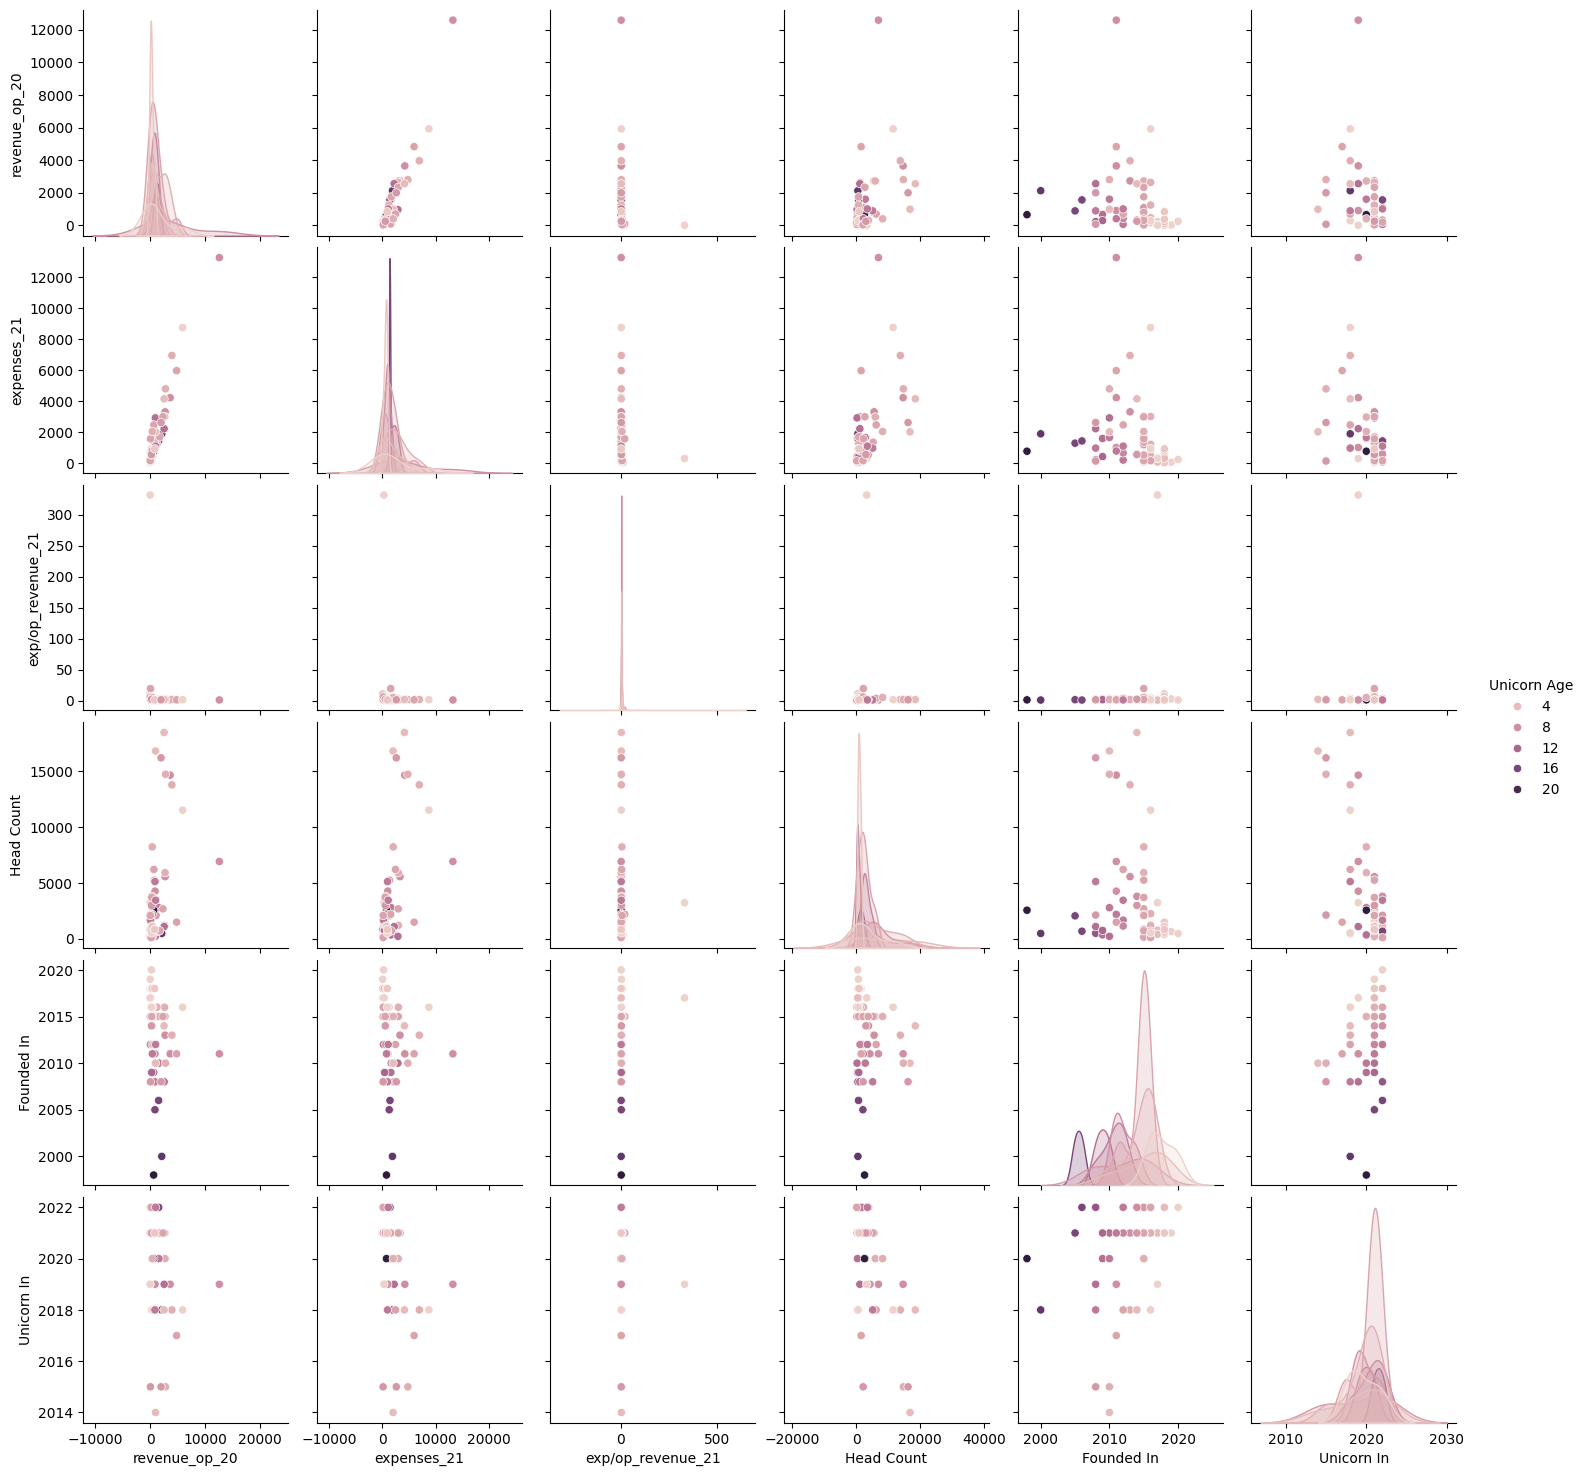

In [67]:
sns.pairplot(df,hue='Unicorn Age')
plt.show()